In [1]:
import shapefile
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Load the Shapefile for Houston zip codes
sf = shapefile.Reader("tl_2020_us_zcta510/tl_2020_us_zcta510.shp")

# Get the index of the "ZCTA5CE10" field
zip_field_idx = [f[0] for f in sf.fields].index("ZCTA5CE10") - 1

# Define the coordinates of the bounding box for Houston
lon_min, lat_min = -95.7998, 29.5235
lon_max, lat_max = -95.2557, 30.1102

# Create an empty list to store all the polygons for Houston zip codes
polygons = []

# Loop through all the zip codes and extract their polygon coordinates
for i, rec in enumerate(sf.records()):
    # Get the zip code
    zip_code = rec[zip_field_idx]
    
    # Get the shape for the zip code
    shape = sf.shapeRecord(zip_field_idx + 1 + i)
    
    # Get the polygon coordinates for the zip code
    polygon = shape.shape.points
    
    # Check if the zip code falls within Houston
    if all(lon_min <= p[0] <= lon_max and lat_min <= p[1] <= lat_max for p in polygon):
        # Append the polygon to the list
        polygons.append(Polygon(polygon))

# Create a MultiPolygon patch for all the polygons in the list
mp_patch = PatchCollection(polygons, facecolor='none', edgecolor='blue')

# Create a new plot for all the zip codes
fig, ax = plt.subplots(figsize=(8, 8))
ax.add_collection(mp_patch)

# Set the axis limits and title
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])
ax.set_title("Houston Zip Codes")

# Show the plot
plt.show()


IndexError: Shape or Record index out of range.

Zip Code: 77379
  (-95.588788, 30.054613)
  (-95.588653, 30.054616)
  (-95.588290, 30.054618)
  (-95.588173, 30.054618)
  (-95.588033, 30.054619)
  (-95.587781, 30.054621)
  (-95.587262, 30.054624)
  (-95.587207, 30.054624)
  (-95.586993, 30.054626)
  (-95.586961, 30.054626)
  (-95.586801, 30.054628)
  (-95.585806, 30.054635)
  (-95.585638, 30.054633)
  (-95.583619, 30.054650)
  (-95.583454, 30.054647)
  (-95.583117, 30.054654)
  (-95.581695, 30.054658)
  (-95.581590, 30.054660)
  (-95.581171, 30.054668)
  (-95.580617, 30.054671)
  (-95.579916, 30.054674)
  (-95.579732, 30.054670)
  (-95.578954, 30.054671)
  (-95.578847, 30.054667)
  (-95.578758, 30.054670)
  (-95.578683, 30.054687)
  (-95.578619, 30.054712)
  (-95.578559, 30.054751)
  (-95.578309, 30.054997)
  (-95.578001, 30.055319)
  (-95.577304, 30.056024)
  (-95.577173, 30.056151)
  (-95.576776, 30.056559)
  (-95.576516, 30.056821)
  (-95.575736, 30.057614)
  (-95.575529, 30.057813)
  (-95.575373, 30.057952)
  (-95.574912, 30.0583

Zip Code: 77028
  (-95.328740, 29.820029)
  (-95.327323, 29.820123)
  (-95.325832, 29.820376)
  (-95.323778, 29.820839)
  (-95.322102, 29.821595)
  (-95.321686, 29.821783)
  (-95.320582, 29.822321)
  (-95.318570, 29.823317)
  (-95.318447, 29.823407)
  (-95.316647, 29.824849)
  (-95.316594, 29.824930)
  (-95.315134, 29.826308)
  (-95.315028, 29.826390)
  (-95.313850, 29.827630)
  (-95.313765, 29.827710)
  (-95.310766, 29.830574)
  (-95.309668, 29.831696)
  (-95.309133, 29.832174)
  (-95.308782, 29.832489)
  (-95.308180, 29.833050)
  (-95.304081, 29.837101)
  (-95.303271, 29.837871)
  (-95.302049, 29.839014)
  (-95.301961, 29.839103)
  (-95.300470, 29.840604)
  (-95.300113, 29.840951)
  (-95.297019, 29.843960)
  (-95.295257, 29.845678)
  (-95.294813, 29.846096)
  (-95.293573, 29.847324)
  (-95.292259, 29.848524)
  (-95.292071, 29.848695)
  (-95.289930, 29.850883)
  (-95.289038, 29.851746)
  (-95.288938, 29.851601)
  (-95.288843, 29.851524)
  (-95.288622, 29.851359)
  (-95.288339, 29.8512

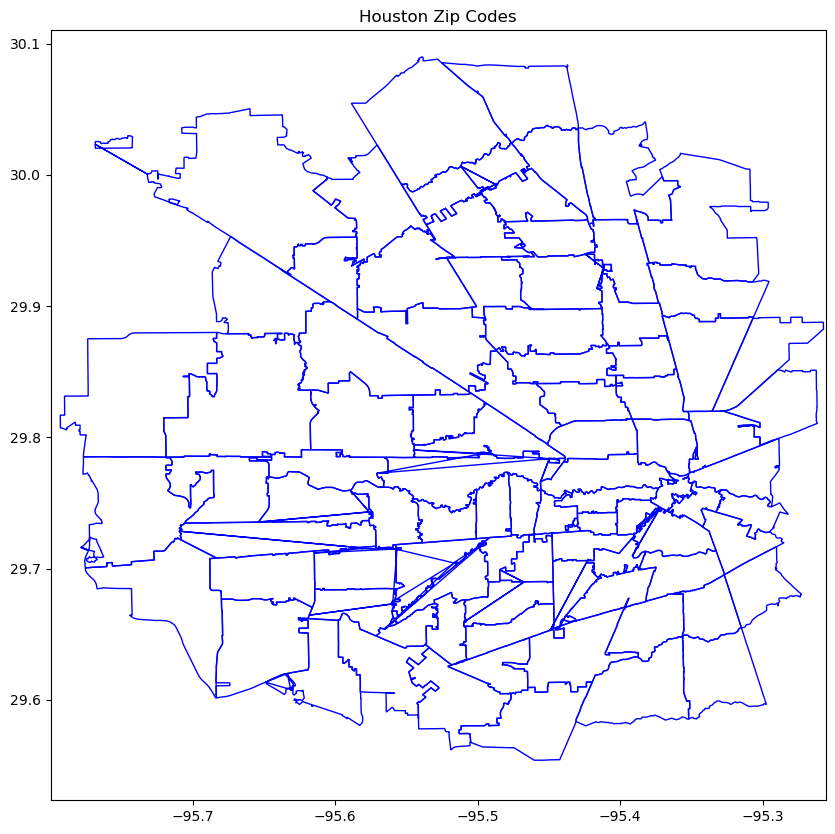

In [3]:
# Load the Shapefile for Houston zip codes
sf = shapefile.Reader("tl_2020_us_zcta510/tl_2020_us_zcta510.shp")

# Get the index of the "ZCTA5CE10" field
zip_field_idx = [f[0] for f in sf.fields].index("ZCTA5CE10") - 1

# Define the coordinates of the bounding box for Houston
lon_min, lat_min = -95.7998, 29.5235
lon_max, lat_max = -95.2557, 30.1102

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through all the zip codes and extract their polygon coordinates
for i, shape in enumerate(sf.shapes()):
    # Get the zip code
    zip_code = sf.record(i)[zip_field_idx]
    
    # Get the polygon coordinates for the zip code
    polygon = shape.points
    
    # Check if the zip code falls within Houston
    if all(lon_min <= p[0] <= lon_max and lat_min <= p[1] <= lat_max for p in polygon):
        # Create a Polygon patch for the zip code
        poly_patch = Polygon(polygon, facecolor='none', edgecolor='blue')

        # Add the patch to the plot
        ax.add_patch(poly_patch)

        # Print the polygon coordinates
        print("Zip Code: {}".format(zip_code))
        for p in polygon:
            print("  ({:.6f}, {:.6f})".format(p[0], p[1]))

# Set the axis limits and title
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])
ax.set_title("Houston Zip Codes")

# Show the plot
plt.show()


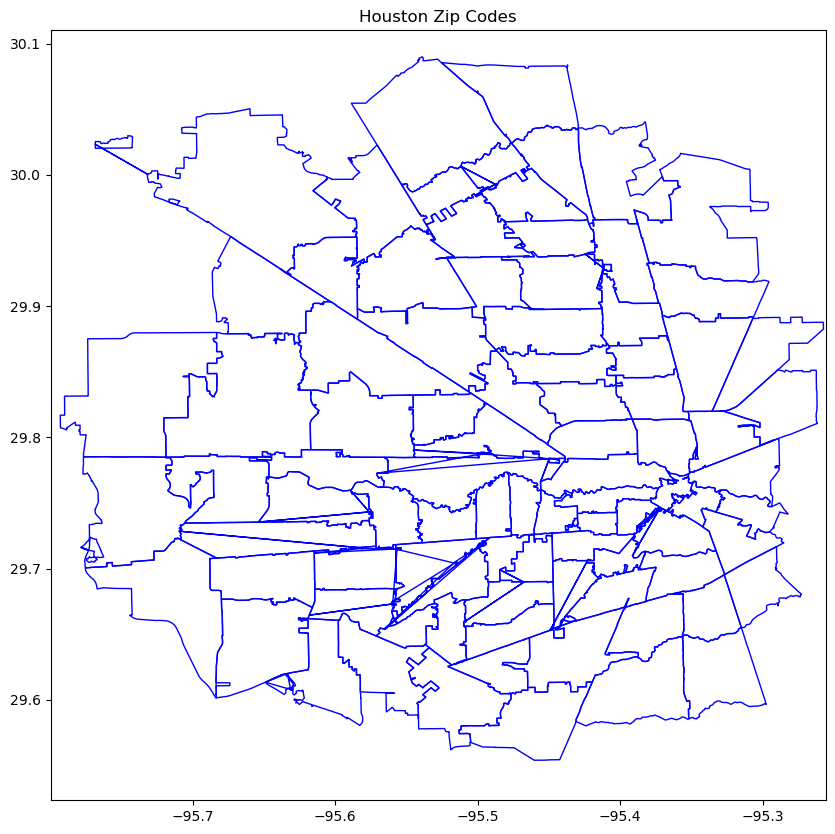